<a href="https://colab.research.google.com/github/vaidande/DogVsCat-VGG16/blob/main/Dogs_Vs_Cat_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [3]:
train_data = image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/training_set',
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))
val_data = image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/test_set',
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


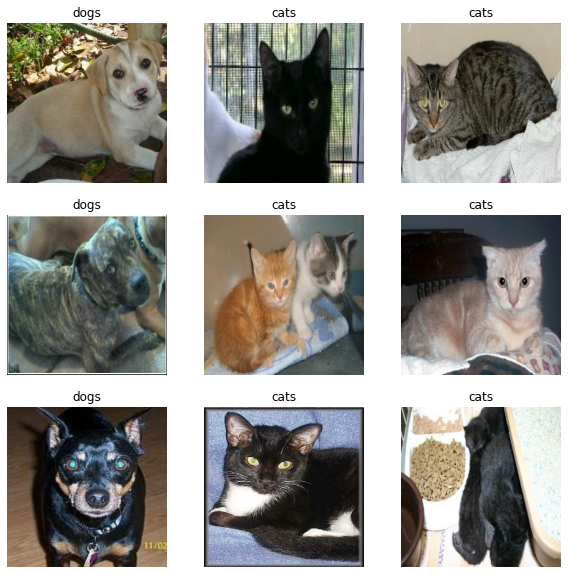

In [4]:
#visualizing some images..
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_dataset = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_dataset = val_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
base_model = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [8]:
#freezing model..existing weights and biases will be NOT be trained!
base_model.trainable = False

In [9]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/training_set/*')

In [11]:
x = Flatten()(base_model.output)
x = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/model/dogvscat_vgg16.h5", monitor = metric, save_best_only=True, mode = 'auto', verbose = 1)

In [15]:
initial_epochs = 10
r = model.fit_generator(train_dataset,
                        validation_data=val_dataset,
                        epochs=initial_epochs, callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
250/250 [==============================] - 131s 487ms/step - loss: 0.4172 - accuracy: 0.8215 - val_loss: 0.3650 - val_accuracy: 0.8660

Epoch 00001: val_accuracy improved from -inf to 0.86600, saving model to /content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/model/dogvscat_vgg16.h5
Epoch 2/10
250/250 [==============================] - 118s 472ms/step - loss: 0.2049 - accuracy: 0.9197 - val_loss: 0.1944 - val_accuracy: 0.9265

Epoch 00002: val_accuracy improved from 0.86600 to 0.92650, saving model to /content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/model/dogvscat_vgg16.h5
Epoch 3/10
250/250 [==============================] - 118s 470ms/step - loss: 0.1736 - accuracy: 0.9301 - val_loss: 0.1947 - val_accuracy: 0.9265

Epoch 00003: val_accuracy did not improve from 0.92650
Epoch 4/10
250/250 [==============================] - 117s 470ms/step - loss: 0.1582 - accuracy: 0.9389 - val_loss: 0.2000 - val_accuracy: 0.9195

Epoch 00004: val_accuracy did not improve fr

In [17]:
#unfreezing base_model..
base_model.trainable = True

In [18]:
#freezing base_model except bottom layers..
for layer in base_model.layers:
  if layer.name == 'block4_conv1':
    break
  layer.trainable = False
  print('Layer '+layer.name+' frozen!')

Layer input_1 frozen!
Layer block1_conv1 frozen!
Layer block1_conv2 frozen!
Layer block1_pool frozen!
Layer block2_conv1 frozen!
Layer block2_conv2 frozen!
Layer block2_pool frozen!
Layer block3_conv1 frozen!
Layer block3_conv2 frozen!
Layer block3_conv3 frozen!
Layer block3_pool frozen!


In [19]:
base_lr = 0.001
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = base_lr/10), metrics=['accuracy'])

In [20]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

r_fine = model.fit_generator(train_dataset,
                        validation_data=val_dataset,
                        epochs=total_epochs,
                        initial_epoch = r.epoch[-1],
                        callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 10/20
250/250 [==============================] - 127s 500ms/step - loss: 0.7120 - accuracy: 0.7685 - val_loss: 0.1716 - val_accuracy: 0.9290

Epoch 00010: val_accuracy did not improve from 0.93450
Epoch 11/20
250/250 [==============================] - 125s 501ms/step - loss: 0.1525 - accuracy: 0.9404 - val_loss: 0.1698 - val_accuracy: 0.9440

Epoch 00011: val_accuracy improved from 0.93450 to 0.94400, saving model to /content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/model/dogvscat_vgg16.h5
Epoch 12/20
250/250 [==============================] - 126s 502ms/step - loss: 0.1121 - accuracy: 0.9544 - val_loss: 0.0900 - val_accuracy: 0.9705

Epoch 00012: val_accuracy improved from 0.94400 to 0.97050, saving model to /content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/model/dogvscat_vgg16.h5
Epoch 13/20
250/250 [==============================] - 126s 502ms/step - loss: 0.0748 - accuracy: 0.9698 - val_loss: 0.0895 - val_accuracy: 0.9730

Epoch 00013: val_accuracy improved fr

In [29]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/model/dogvscat_vgg16.h5')

In [30]:
test_image = image.load_img('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/single_prediction/pixie_terrace.jpg', target_size=(224,224))

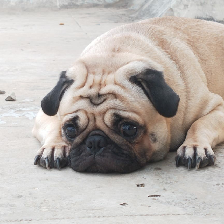

In [31]:
test_image

In [32]:
test_img = image.img_to_array(test_image)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [33]:
a=np.argmax(result, axis=1)

In [36]:
if a==0:
  print("Its a Cat!")
else:
  print("Its a Dog!")

Its a Dog!
